### Enter Aircraft Code

In [209]:
aircraft_code = "N607UP"

In [210]:
from bs4 import BeautifulSoup
import requests

HEADERS = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.62'
    }
html_text = requests.get("https://flightaware.com/resources/registration/" + aircraft_code, headers=HEADERS).text

In [211]:
soup = BeautifulSoup(html_text, 'lxml')

In [212]:
info = soup.find('div', class_="pageContainer")
f = info.findAll('div', class_='attribute-row')

In [213]:
def remove_delimiters(word):
    h = []
    for i in word:
        if i != '\n' and i != '\t':
            h.append(i)
    return "".join(h)

In [214]:
d = {}
for flight_number_info in f:
    d[flight_number_info.find('div', class_='medium-1 columns title-text').text] = remove_delimiters(flight_number_info.find('div', class_='medium-3 columns').text.replace('\n', ' '))

d

{'Summary': '2017 BOEING 747-8F Fixed wing multi engine (8 seats / 4 engines)',
 'Owner': 'C C & E I LLC LOUISVILLE , KY, US ',
 'Airworthiness Class': 'Standard/Transport',
 'Serial Number': '64265',
 'Engine': 'GE GENX-2B67/P (Turbo-fan)Thrust: 67400lbs',
 'Weight': 'Over 20,000lbs',
 'Speed': 'Not defined',
 'Mode S Code': '051761420 / A7E310',
 'Status': 'Assigned',
 'Certificate Issue Date': '2017-10-19',
 'Airworthiness Date': '2017-10-15',
 'Last Action Date': '2020-06-01',
 'Expiration': '2023-10-31',
 'Registry Source': 'FAA'}

### Further Information

In [215]:
ac2 = aircraft_code.upper()
req = requests.get("https://www.flightera.net/en/planes/"+ac2, headers=HEADERS)
html_text = req.content

In [216]:
if req.status_code < 300:
    soup2 = BeautifulSoup(html_text, 'lxml')
    info2 = soup2.find('div', class_='mx-auto flex max-w-7xl')
    f = info2.find('div', class_='max-w-7xl mx-auto px-4 sm:px-6 lg:px-8')
    g = f.find('h1',class_='text-xl font-bold leading-tight text-gray-900 dark:text-white').text

    print('Aircraft - ' + remove_delimiters(g))
else:
    print("Not Available")

Aircraft - N607UP: United Parcel Service (UPS) Boeing B747-800


In [217]:
import pandas as pd
if req.status_code < 300:
    tables = pd.read_html(html_text)
    df0 = tables[0]
    df0.rename(columns={0:"", 1:"Information"}, inplace=True)
    display(df0)
else:
    print("Not Available")

,,Information
0,AIRLINE,United Parcel Service (UPS) 5X/UPS
1,STATUS,Active
2,MODEL,B747-8F (B748)
3,ICAO IDENTIFIER,A7E310
4,SEAT CONFIGURATION,Cargo


In [218]:
if req.status_code < 300:
    flight_number_info = info2.find('dl', class_='grid grid-cols-1 gap-x-4 gap-y-4 sm:grid-cols-2 lg:grid-cols-3')
    flight_status = flight_number_info.find('div', class_='mx-auto mb-4 sm:border-l')
    origin = flight_status.find_all('td', class_='text-gray-700 dark:text-gray-200 text-sm py-2 font-medium pr-2')
    l = flight_status.find_all('td', class_='text-gray-900 dark:text-white py-2 text-sm')

    d = dict(zip(origin, l))

    for origin, v in d.items():
        print(f"{origin.text.strip()}: {v.text.strip()}")
else:
    print("Not Available")

MANUFACTURER: Boeing
ENGINES: 4 x GEnx-2B67
FIRST FLIGHT: Oct 2017 (5 years ago)


### Past Flights (If any):

In [219]:
if len(tables) < 3:
    print("No past flights found")
else:
    df1 = tables[2].iloc[:,:-1]
    if 'TO' in df1.keys().tolist():
        flight_number_info=0
        for item in df1['FROM']:
            l = []
            for le in item:
                l.append(le)
                if le == ')':
                    break
            df1['FROM'][flight_number_info] = "".join(l)
            flight_number_info+=1

        flight_number_info=0
        for item in df1['TO']:
            l = []
            for le in item:
                l.append(le)
                if le == ')':
                    break
            df1['TO'][flight_number_info] = "".join(l)
            flight_number_info+=1
        display(df1)
    else:
        print("No past flights found")


,DATE,FLIGHT NUMBER,FROM,TO,DEPARTED,ARRIVED
0,19. Apr Landed,5X203,Philadelphia 54min late Philadelphia (PHL / K...,Cologne 43min late Cologne (CGN / EDDK),10:06 54min late,22:59 43min late
1,14. Apr Landed,5X62,Anchorage 6min late Anchorage (ANC / PANC),Hong Kong 33min late Hong Kong (HKG / VHHH),10:15 6min late,13:15 33min late
2,14. Apr Landed,5X62,Louisville 20min late Louisville (SDF / KSDF),Anchorage 14min late Anchorage (ANC / PANC),03:59 20min late,06:20 14min late
3,13. Apr Landed,5X223,Louisville 55min late Louisville (SDF / KSDF),Cologne 4min early Cologne (CGN / EDDK),04:12 55min late,17:51 4min early
4,12. Apr Landed,5X77,Anchorage 38min late Anchorage (ANC / PANC),Louisville 23min late Louisville (SDF / KSDF),15:45 38min late,01:26 23min late


### Images, If available

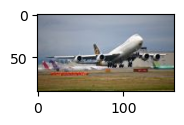

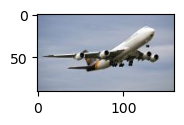

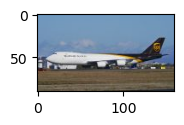

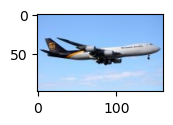

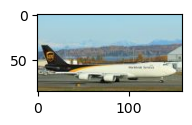

In [220]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import cv2
image_tags = info.findAll('img')
links = []

for tag in image_tags:
    links.append(tag['src'])

for link in links:
    urllib.request.urlretrieve(
    link,"a.png")
    img = Image.open("a.png")
    plt.figure(figsize=(2,1))
    plt.imshow(img)


### Better Image Below

In [221]:
import json

js = requests.get("https://api.planespotters.net/pub/photos/reg/"+aircraft_code)
js.text
data = json.loads(js.text)


In [222]:
if len(data['photos']) > 0:
    data['photos'][0]['thumbnail_large']['src']

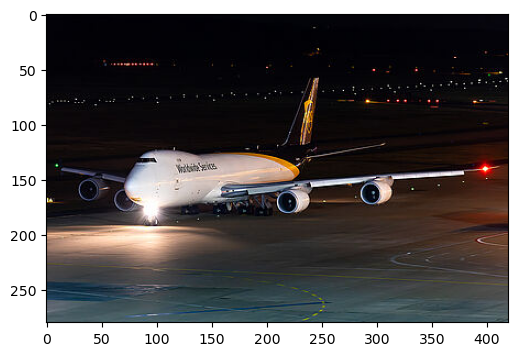

In [223]:
if len(data['photos']) > 0:
    urllib.request.urlretrieve(data['photos'][0]['thumbnail_large']['src'],"a.png")
    img = Image.open("a.png")
    plt.figure(figsize=(6,4))
    plt.imshow(img)
    plt.show()
else:
    print("Not Available")

### Flight Number Lookup

In [224]:
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry


def get_website(site_link, reg_no):
    session = requests.Session()
    adapter = HTTPAdapter(max_retries=Retry(connect=3, backoff_factor=0.5))
    session.mount("http://", adapter)
    session.mount("https://", adapter)
    _request = session.get(site_link + reg_no)
    return _request.status_code, _request.text

In [332]:
sc, html_text = get_website('https://www.flightera.net/en/flight/', 'LH500')

In [333]:
html_text

'\n<!doctype html>\n<html lang="en">\n<head>\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=yes">\n  <link rel="preconnect" href="https://a.pub.network/" crossorigin />\n  <link rel="preconnect" href="https://b.pub.network/" crossorigin />\n  <link rel="preconnect" href="https://c.pub.network/" crossorigin />\n  <link rel="preconnect" href="https://d.pub.network/" crossorigin />\n  <link rel="preconnect" href="https://c.amazon-adsystem.com" crossorigin />\n  <link rel="preconnect" href="https://s.amazon-adsystem.com" crossorigin />\n  <link rel="preconnect" href="https://secure.quantserve.com/" crossorigin />\n  <link rel="preconnect" href="https://rules.quantcount.com/" crossorigin />\n  <link rel="preconnect" href="https://pixel.quantserve.com/" crossorigin />\n  <link rel="preconnect" href="https://cmp.quantcast.com/" crossorigin />\n  <link rel="preconnect" href=

In [334]:
soup = BeautifulSoup(html_text, 'lxml')
info = soup.find('main', class_='flex-auto px-2 max-w-4xl mt-4 mx-auto')


In [335]:
flight_number_info = info.find('dt', class_='text-xl text-center leading-5 font-bold text-gray-800 dark:text-white')
flight_number_info.text.strip()

'Lufthansa LH500  (DLH500)'

In [336]:
flight_status = info.find('dd', class_='text-center text-sm leading-5 text-gray-900 dark:text-white mt-6')
flight_status.text.strip()

'The flight is currently in the air, it left 9 hours ago (20min late) and will arrive in 134 minutes (14min early).'

In [337]:
origin_and_destination = info.findAll('span', class_='text-lg font-medium')
origin_name = origin_and_destination[0].text.strip()
destination_name = origin_and_destination[1].text.strip()
print(origin_name)
destination_name

Munich


'Rio de Janeiro'

In [338]:
origin_airport_code_info = info.find('dd', class_='text-left text-xs leading-5 text-gray-500 dark:text-white')
code_string = remove_delimiters(origin_airport_code_info.text.strip())
origin_airport_code = code_string[0:3] + "/" + code_string[-4:]
origin_airport_code

'MUC/EDDM'

In [339]:
destination_airport_code_info = info.find('dd', class_='text-right text-xs leading-5 text-gray-500 dark:text-white')
code_string = remove_delimiters(destination_airport_code_info.text.strip())
destination_airport_code = code_string[0:3] + "/" + code_string[-4:]
destination_airport_code

'GIG/SBGL'

In [340]:
flight_info = info.find('div', class_='col-span-1 text-xs text-center text-gray-600 dark:text-white mt-6')
flight_duration_info = flight_info.findAll('span', class_='whitespace-nowrap')
flight_duration = flight_duration_info[0].text.strip()
flight_distance = flight_duration_info[1].text.strip()
print(flight_duration)
print(flight_distance)


11h 14m
9,627km  / 5,942mi


In [341]:
terminal_and_gate_origin = info.find('dd', class_='text-left text-sm leading-5 text-gray-800 dark:text-white')
print(terminal_and_gate_origin.text)


TERMINAL: 2
GATE: H24



In [342]:
terminal_and_gate_destination = info.find('dd', class_='text-right text-sm leading-5 text-gray-500 dark:text-white')
print(terminal_and_gate_destination.text)


TERMINAL: 2
GATE: C54



In [343]:
frequency_info = info.find('div', class_='col-span-1 text-left').find('dd')
frequency = frequency_info.find('span').text
print(frequency)
days_running = frequency_info.text.strip()[len(frequency):].strip()
print(days_running)

3x per week
Mon, Wed, Sat


In [344]:
depatrure = info.find("dt", class_="text-left text-md text-base leading-5 text-gray-800 dark:text-gray-100")
departure = depatrure.text.strip()
departure[-9:-4] + " " + departure[-3:]

'2:35\n EST'

In [345]:
arrival = info.find("dt", class_="text-right text-md text-base leading-5 text-gray-800 dark:text-gray-100")
arrival.find("span", class_="whitespace-nowrap").text

'\n18:50\nUTC-03'

In [346]:
airline_name = info.find('dd', class_='text-sm text-right leading-5 text-gray-900 dark:text-white')
print(airline_name.text.strip())

Lufthansa 
LH/DLH


In [347]:
_headings = info.findAll('dt', class_='text-left text-sm leading-5 font-bold text-gray-500 dark:text-gray-300')
plane_info_headings = []
for i in _headings:
    plane_info_headings.append(i.text.strip())

_headings = info.findAll('dt', class_='text-right text-sm leading-5 font-bold text-gray-500 dark:text-gray-300')
for k in _headings:
    plane_info_headings.append(k.text.strip())
plane_info_headings

['MODEL', 'SEAT CONFIGURATION', 'ICAO IDENTIFIER', 'FIRST FLIGHT']

In [348]:
model_and_seat_config_info = info.findAll('dd', class_='text-left text-sm leading-5 text-gray-500 dark:text-white')
plane_info_items = []
for i in model_and_seat_config_info:
    plane_info_items.append(i.text.strip())

icao_identifier = info.find('dd', class_='text-right text-sm leading-5 text-gray-900 dark:text-white')
plane_info_items.append(icao_identifier.text.strip())

first_flight = info.findAll('dd', class_='text-right text-sm leading-5 text-gray-500 dark:text-white')[1]
plane_info_items.append(first_flight.text.strip())


plane_info_items[0] = " ".join(plane_info_items[0].split()) 
plane_info_items[3] = plane_info_items[3][0:8]

print(plane_info_items[0])
print(plane_info_items[1])
print(plane_info_items[2])

plane_info_items

D-AIXL Airbus A350-900
293 seats
48 Business
21 Eco+
224 Economy
3C670C


['D-AIXL Airbus A350-900',
 '293 seats\n48 Business\n21 Eco+\n224 Economy',
 '3C670C',
 'Oct 2018']

In [349]:
plane_info_dict = dict(zip(plane_info_headings, plane_info_items))
plane_info_dict

{'MODEL': 'D-AIXL Airbus A350-900',
 'SEAT CONFIGURATION': '293 seats\n48 Business\n21 Eco+\n224 Economy',
 'ICAO IDENTIFIER': '3C670C',
 'FIRST FLIGHT': 'Oct 2018'}

In [350]:
tables = pd.read_html(html_text)

In [351]:
df = tables[0]
df

,DATE,FLIGHT NUMBER,FROM,TO,DEPARTED,ARRIVED,Unnamed: 6
0,30. Apr Live,LH500,Munich 20min late Munich (MUC / EDDM) 12:15 ...,Rio de Janeiro 14min early Rio de Janeiro (GI...,12:35 20min late,18:50 * 14min early,NaN
1,27. Apr Landed,LH500,Munich 21min late Munich (MUC / EDDM) 12:15 ...,Rio de Janeiro 15min early Rio de Janeiro (GI...,12:36 21min late,18:49 15min early,NaN
2,25. Apr Landed,LH500,Munich 20min late Munich (MUC / EDDM) 12:15 ...,Rio de Janeiro 2min early Rio de Janeiro (GIG...,12:35 20min late,19:03 2min early,NaN
3,23. Apr Landed,LH500,Munich 22min late Munich (MUC / EDDM) 12:15 ...,Rio de Janeiro 9min early Rio de Janeiro (GIG...,12:37 22min late,18:55 9min early,NaN
4,20. Apr Landed,LH500,Munich 25min late Munich (MUC / EDDM) 12:15 ...,Rio de Janeiro 35min late Rio de Janeiro (GIG...,12:40 25min late,19:40 35min late,NaN


In [352]:
df = df.iloc[:, :-1]

In [353]:
df

,DATE,FLIGHT NUMBER,FROM,TO,DEPARTED,ARRIVED
0,30. Apr Live,LH500,Munich 20min late Munich (MUC / EDDM) 12:15 ...,Rio de Janeiro 14min early Rio de Janeiro (GI...,12:35 20min late,18:50 * 14min early
1,27. Apr Landed,LH500,Munich 21min late Munich (MUC / EDDM) 12:15 ...,Rio de Janeiro 15min early Rio de Janeiro (GI...,12:36 21min late,18:49 15min early
2,25. Apr Landed,LH500,Munich 20min late Munich (MUC / EDDM) 12:15 ...,Rio de Janeiro 2min early Rio de Janeiro (GIG...,12:35 20min late,19:03 2min early
3,23. Apr Landed,LH500,Munich 22min late Munich (MUC / EDDM) 12:15 ...,Rio de Janeiro 9min early Rio de Janeiro (GIG...,12:37 22min late,18:55 9min early
4,20. Apr Landed,LH500,Munich 25min late Munich (MUC / EDDM) 12:15 ...,Rio de Janeiro 35min late Rio de Janeiro (GIG...,12:40 25min late,19:40 35min late
